In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
from pandas.core import indexing
from pathos.pools import ProcessPool
from scipy import linalg, interpolate
from sklearn import gaussian_process as gp
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

from spaces_nd import GRF_nd, construct_grid, construct_points


(0.0, 1.0, 0.0, 1.0)

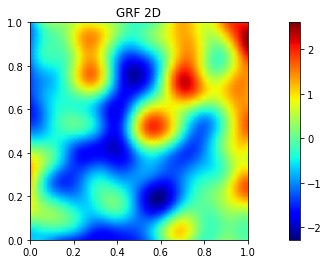

In [3]:
num = 1
space = GRF_nd(1, dim=2, length_scale=0.1, N=50, interp="cubic")
sensors = space.x
features = space.random(num)
sensor_values = space.eval_u(features, sensors)
grid,U = construct_grid(sensors, sensor_values, shape=space.N)
X,Y = grid
fig = plt.figure()
c = plt.pcolormesh(X,Y,U,cmap='jet',shading='gouraud')
fig.colorbar(c)
plt.title('GRF 2D')
plt.axis('square')

(0.0, 1.0, 0.0, 1.0)

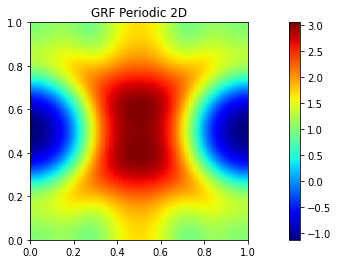

In [4]:
num = 1
space = GRF_nd(1, dim=2, length_scale=0.5, N=50, interp="cubic")
sensors = space.x
features = space.random(num)
sensor_values = space.eval_u(features, np.sin(np.pi*sensors)**2)
grid,U = construct_grid(sensors, sensor_values, shape=space.N)
X,Y = grid
fig = plt.figure()
c = plt.pcolormesh(X,Y,U,cmap='jet',shading='gouraud')
fig.colorbar(c)
plt.title('GRF Periodic 2D')
plt.axis('square')

(0.0, 1.0, 0.0, 1.0)

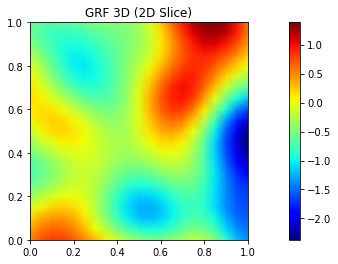

In [5]:
num = 1
space = GRF_nd(1, dim=3, length_scale=0.2, N=21, interp="linear") # no cubic interpolation for 3D
sensors = space.x
features = space.random(num)
sensor_values = space.eval_u(features, sensors)
grid,U = construct_grid(sensors, sensor_values, shape=space.N)
X,Y,Z = grid
fig = plt.figure()
c = plt.pcolormesh(X[...,0],Y[...,0],U[...,0],cmap='jet',shading='gouraud')
fig.colorbar(c)
plt.title('GRF 3D (2D Slice)')
plt.axis('square')

In [6]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

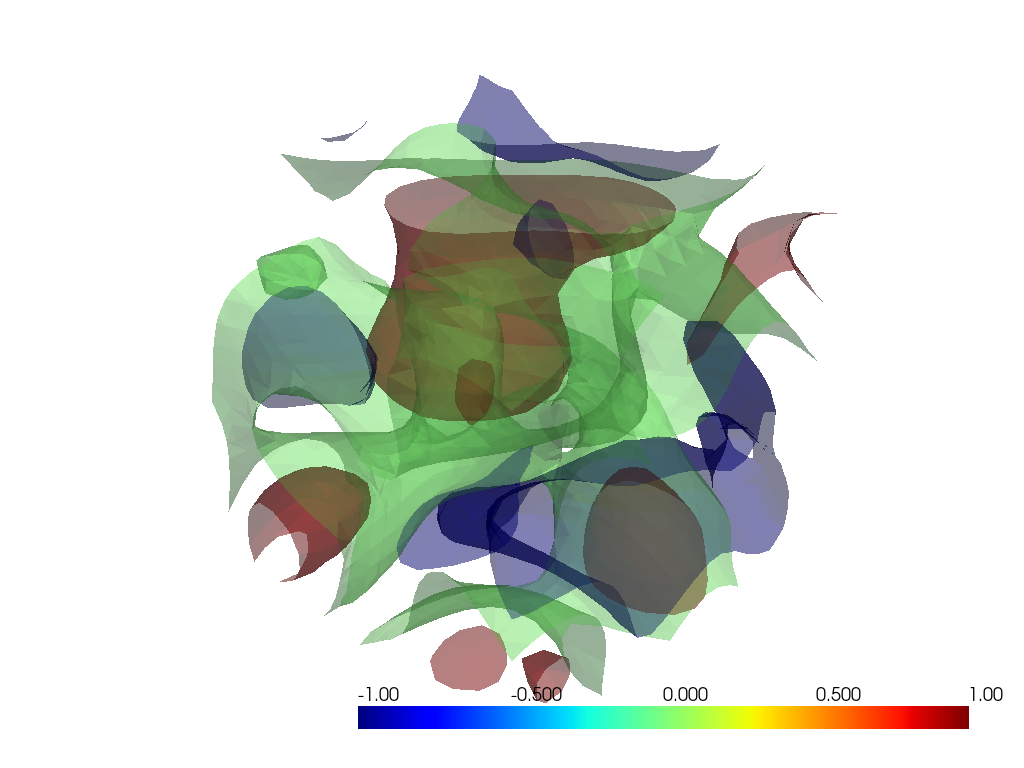

In [12]:
from numpy import cos, pi, mgrid
import pyvista as pv

#%% Data
# x, y, z = pi*mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
# vol = cos(x) + cos(y) + cos(z)
grid = pv.StructuredGrid(X, Y, Z)
grid["vol"] = U.flatten()
contours = grid.contour([-1,0,1],scalars='vol')

#%% Visualization
pv.set_plot_theme('document')
pv.set_jupyter_backend('static')

p = pv.Plotter()
p.add_mesh(contours, scalars=contours.active_scalars, clim=[-1,1], cmap='jet', opacity=0.5)
p.show()


In [11]:
# !jupyter nbextension enable --py --sys-prefix ipygany

Enabling notebook extension ipygany/extension...
      - Validating: ok


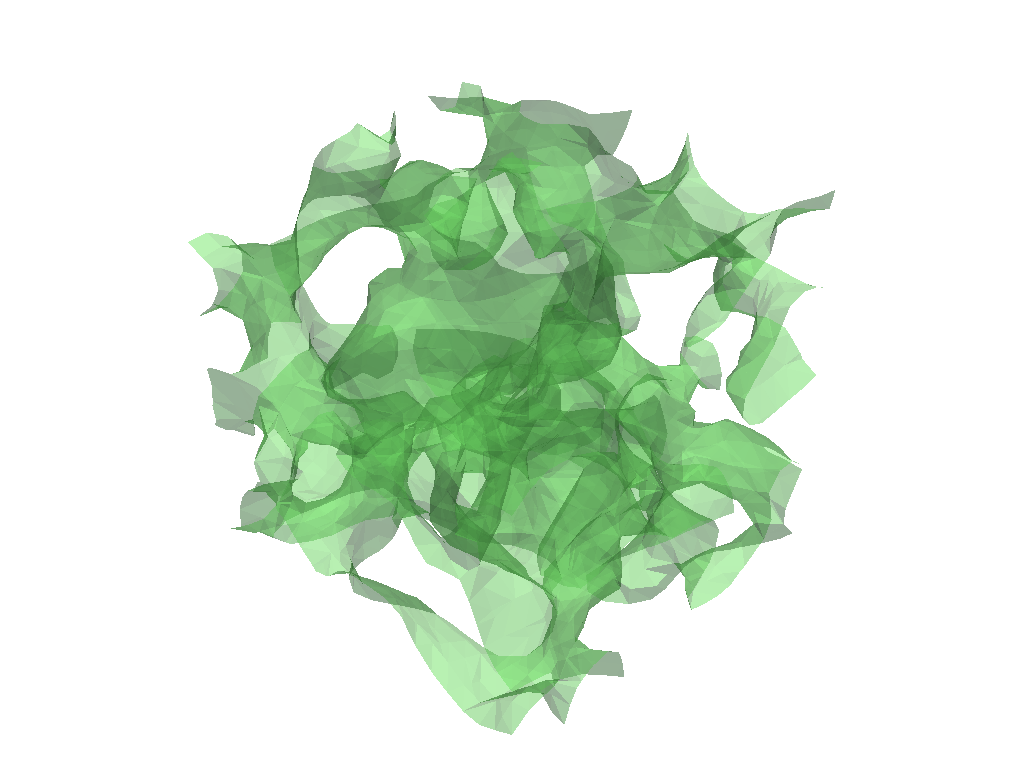

In [24]:
# sargs = dict(interactive=True)  # Simply make the bar interactive
pv.set_jupyter_backend('static')

p = pv.Plotter()

p.add_mesh(contours, scalars=contours.active_scalars, clim=[-1,1], cmap='jet', opacity=0.5, show_scalar_bar=False)
p.show()


In [68]:
U.min()

-3.003755625801002

In [39]:
grid['vol']

array([-0.93646707, -0.72864785, -0.6952657 , ...,  0.54616783,
        1.29029063,  1.50806775])

In [47]:
contours.active_scalars

pyvista_ndarray([0.04960102, 0.03451024, 0.03388413, ..., 1.        ,
                 1.        , 1.        ])